In [593]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [594]:
il = gpd.read_file("IL_BNDY_County/IL_BNDY_County_Py.shp")

<Axes: >

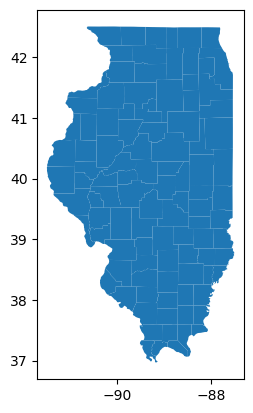

In [595]:
il.plot()

In [596]:
il.head()

,COUNTY_NAM,CO_FIPS,geometry
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."


In [597]:
import pandas as pd
drug_data = pd.read_excel("drug-overdose-deaths-2021-2022.xlsx")
drug_data.head()

,Unnamed: 0,Any 2021,Any 2022,Opioid 2021,Opioid 2022,Synthetic 2021,Synthetic 2022,Heroin 2021,Heroin 2022,Natural SS 2021,...,Cocaine 2022,Alc 2021,Unnamed: 14,Alc 2022,Psy 2021,Psy 2022,Bnz 2021,Bnz 2022,Xyl 2021,Xyl 2022
0,Calhoun,2,2,2,2,2,2,0,0,0,...,0,NaN,1,0,1,1,0,0,0,0
1,Carroll,0,1,0,1,0,1,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
2,Cass,3,1,1,1,1,1,0,1,0,...,0,NaN,0,0,1,1,0,0,0,0
3,Champaign,53,59,40,40,37,40,8,9,1,...,19,NaN,2,0,10,13,0,0,2,1
4,Christian,5,2,3,1,1,0,1,0,1,...,0,NaN,0,0,3,0,1,0,0,0


In [598]:
drug_data['Any 2021'].mean(), drug_data['Any 2021'].std()

(57.11224489795919, 242.1530947392903)

In [599]:
drug_data['Any 2022'].mean(), drug_data['Any 2022'].std()

(60.13265306122449, 257.45753879739146)

In [600]:
drug_data = drug_data.drop(columns=['Alc 2021'])

In [601]:
import pandas as pd

all_counties = [
    "Adams", "Alexander", "Bond", "Boone", "Brown", "Bureau", "Calhoun", "Carroll",
    "Cass", "Champaign", "Christian", "Clark", "Clay", "Clinton", "Coles", "Cook",
    "Crawford", "Cumberland", "DeKalb", "DeWitt", "Douglas", "DuPage", "Edgar",
    "Edwards", "Effingham", "Fayette", "Ford", "Franklin", "Fulton", "Gallatin",
    "Greene", "Grundy", "Hamilton", "Hancock", "Hardin", "Henderson", "Henry",
    "Iroquois", "Jackson", "Jasper", "Jefferson", "Jersey", "Jo Daviess", "Johnson",
    "Kane", "Kankakee", "Kendall", "Knox", "LaSalle", "Lake", "Lawrence", "Lee",
    "Livingston", "Logan", "McDonough", "McHenry", "McLean", "Macon", "Macoupin",
    "Madison", "Marion", "Marshall", "Mason", "Massac", "Menard", "Mercer", "Monroe",
    "Montgomery", "Morgan", "Moultrie", "Ogle", "Peoria", "Perry", "Piatt", "Pike",
    "Pope", "Pulaski", "Putnam", "Randolph", "Richland", "Rock Island", "Saline",
    "Sangamon", "Schuyler", "Scott", "Shelby", "St. Clair", "Stark", "Stephenson",
    "Tazewell", "Union", "Vermilion", "Wabash", "Warren", "Washington", "Wayne",
    "White", "Whiteside", "Will", "Williamson", "Winnebago", "Woodford"
]

missing_counties = [county for county in all_counties if county not in drug_data['Unnamed: 0'].unique()]

missing_df = pd.DataFrame({'Unnamed: 0': missing_counties})

updated_df = pd.concat([drug_data, missing_df], ignore_index=True)

updated_df

,Unnamed: 0,Any 2021,Any 2022,Opioid 2021,Opioid 2022,Synthetic 2021,Synthetic 2022,Heroin 2021,Heroin 2022,Natural SS 2021,...,Cocaine 2021,Cocaine 2022,Unnamed: 14,Alc 2022,Psy 2021,Psy 2022,Bnz 2021,Bnz 2022,Xyl 2021,Xyl 2022
0,Calhoun,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Carroll,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cass,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Champaign,53.0,59.0,40.0,40.0,37.0,40.0,8.0,9.0,1.0,...,17.0,19.0,2.0,0.0,10.0,13.0,0.0,0.0,2.0,1.0
4,Christian,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Bureau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,DeKalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,DeWitt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,DuPage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [602]:
updated_df.fillna(0, inplace=True)
updated_df.rename(columns={'Unnamed: 0': 'COUNTY_NAM'}, inplace=True)

In [603]:
updated_df = updated_df[updated_df['COUNTY_NAM'].isin(all_counties)].reset_index()

In [604]:
updated_df

,index,COUNTY_NAM,Any 2021,Any 2022,Opioid 2021,Opioid 2022,Synthetic 2021,Synthetic 2022,Heroin 2021,Heroin 2022,...,Cocaine 2021,Cocaine 2022,Unnamed: 14,Alc 2022,Psy 2021,Psy 2022,Bnz 2021,Bnz 2022,Xyl 2021,Xyl 2022
0,0,Calhoun,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,Carroll,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Cass,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3,Champaign,53.0,59.0,40.0,40.0,37.0,40.0,8.0,9.0,...,17.0,19.0,2.0,0.0,10.0,13.0,0.0,0.0,2.0,1.0
4,4,Christian,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,103,Bureau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,104,DeKalb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,105,DeWitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,106,DuPage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [605]:
updated_df['COUNTY_NAM'] = updated_df['COUNTY_NAM'].str.upper()

In [606]:
merged_df = il.merge(updated_df, on='COUNTY_NAM', how='left')

In [607]:
merged_df = merged_df.drop(columns=['index'])

Text(0.5, 1.0, 'Drug overdose cases in 2021')

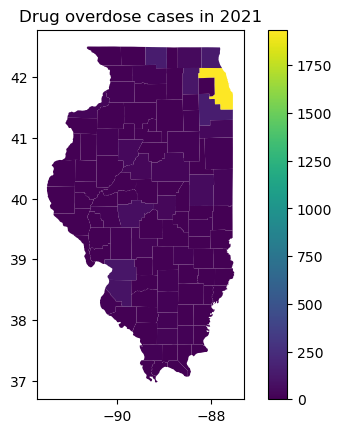

In [608]:
merged_df.plot(column="Any 2021",legend=True) 
plt.title("Drug overdose cases in 2021") 

Text(0.5, 1.0, 'Drug overdose cases in 2022')

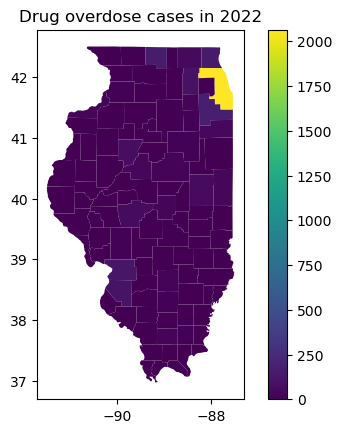

In [609]:
merged_df.plot(column="Any 2022",legend=True) 
plt.title("Drug overdose cases in 2022")

In [610]:
minus_cook = merged_df[merged_df['COUNTY_NAM'] != 'COOK']

Text(0.5, 1.0, 'Drug overdose cases in 2021 (Cook County Excluded)')

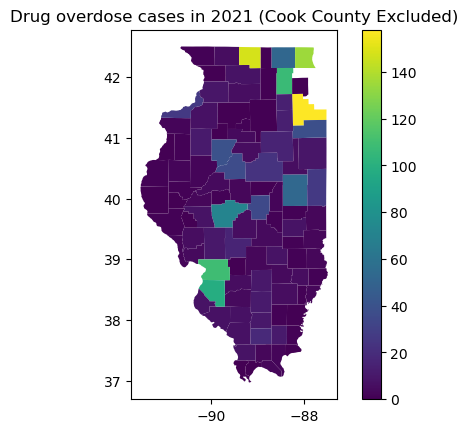

In [611]:
minus_cook.plot(column="Any 2021",legend=True) 
plt.title("Drug overdose cases in 2021 (Cook County Excluded)") 

Text(0.5, 1.0, 'Drug overdose cases in 2022 (Cook County Excluded)')

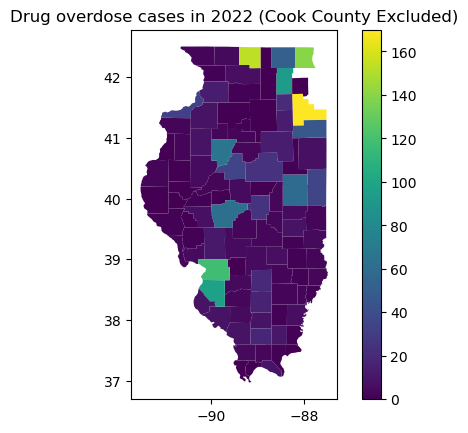

In [612]:

minus_cook.plot(column="Any 2022",legend=True) 
plt.title("Drug overdose cases in 2022 (Cook County Excluded)")

In [613]:
income_data = pd.read_csv("income_data.csv")
income_data.head()

,County Name,"2,022","2,021"
0,Adams County,"56,218","56,077"
1,Alexander County,"48,741","49,757"
2,Bond County,"45,366","45,397"
3,Boone County,"55,513","55,444"
4,Brown County,"46,761","44,437"


In [614]:
income_data['County Name'] = income_data['County Name'].str.replace(" County", "")

In [615]:
income_data.rename(columns={'County Name': 'COUNTY_NAM'}, inplace=True)
income_data.rename(columns={'2,021': '2021'}, inplace=True)
income_data.rename(columns={'2,022': '2022'}, inplace=True)
income_data[income_data['COUNTY_NAM'] == 'Cook']
income_data['COUNTY_NAM'] = income_data['COUNTY_NAM'].str.upper()

In [616]:
income_data[income_data['COUNTY_NAM'] == 'COOK']

,COUNTY_NAM,2022,2021
15,COOK,"72,847","72,979"


In [617]:
income_data['2022'] = income_data['2022'].str.replace(',','').astype(int)
income_data['2021'] = income_data['2021'].str.replace(',','').astype(int)

In [618]:
geo_income_df = il.merge(income_data, on='COUNTY_NAM', how='left')

In [619]:
# geo_income_df['2022'] = geo_income_df['2022'].str.replace(',','').astype(int)
# geo_income_df['2021'] = geo_income_df['2021'].str.replace(',','').astype(int)

In [620]:
income_data['2021'].mean(), income_data['2021'].std()

(54524.55882352941, 8607.34143195264)

In [621]:
income_data['2022'].mean(), income_data['2022'].std()

(54878.51960784314, 9237.254908904863)

Text(0.5, 1.0, 'Income in 2022')

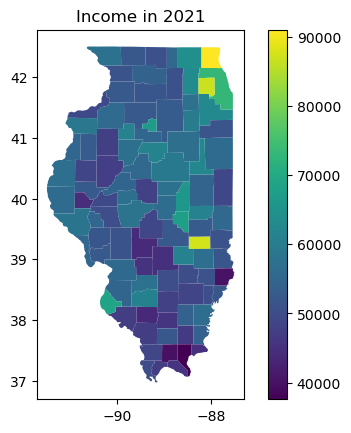

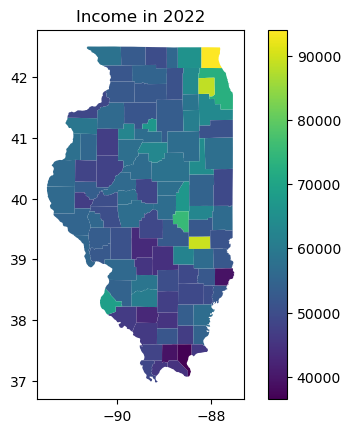

In [622]:
geo_income_df.plot(column="2021",legend=True) 
plt.title("Income in 2021") 
geo_income_df.plot(column="2022",legend=True) 
plt.title("Income in 2022")

In [623]:
geo_income_df[geo_income_df['COUNTY_NAM'] == 'COOK']


,COUNTY_NAM,CO_FIPS,geometry,2022,2021
29,COOK,31,"POLYGON ((-88.23857 42.15424, -88.21937 42.154...",72847,72979


In [649]:
edu_df = pd.read_csv('education_data.csv', header=None)

edu_df.set_index(0, inplace=True)

edu_df = edu_df.transpose()

edu_df.columns = edu_df.columns.str.strip()

edu_df.columns

Index(['Label (Grouping)', 'AGE BY EDUCATIONAL ATTAINMENT',
       'Population 18 to 24 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Population 25 years and over', 'Less than 9th grade',
       '9th to 12th grade no diploma',
       'High school graduate (includes equivalency)', 'Some college no degree',
       'Associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'High school graduate or higher',
       'Bachelor's degree or higher', 'Population 25 to 34 years',
       'High school graduate or higher', 'Bachelor's degree or higher',
       'Population 35 to 44 years', 'High school graduate or higher',
       'Bachelor's degree or higher', 'Population 45 to 64 years',
       'High school graduate or higher', 'Bachelor's degree or higher',
       'Population 65 years and over', 'High school graduate or higher',
       'Bach

In [650]:
def make_unique_columns(cols):
    counts = {}
    new_cols = []
    for col in cols:
        if col in counts:
            counts[col] += 1
            new_cols.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            new_cols.append(col)
    return new_cols

edu_df.columns = make_unique_columns(edu_df.columns)

In [651]:
edu_df = edu_df[edu_df['Label (Grouping)'].str.count("Total!!Estimate") == 1].reset_index()

In [652]:
edu_df

,index,Label (Grouping),AGE BY EDUCATIONAL ATTAINMENT,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,...,Bachelor's degree or higher_2,Population 35 to 44 years,High school graduate or higher_2,Bachelor's degree or higher_3,Population 45 to 64 years,High school graduate or higher_3,Bachelor's degree or higher_4,Population 65 years and over,High school graduate or higher_4,Bachelor's degree or higher_5
0,1,Illinois!!Total!!Estimate,NaN,"1,172,987","124,779","411,110","444,301","192,797","8,692,839","401,489",...,"758,624","1,673,268","1,525,068","742,344","3,164,813","2,825,058","1,124,235","2,164,940","1,909,981","650,215"
1,13,Champaign County Illinois!!Total!!Estimate,NaN,"47,998","2,664","8,908","26,277","10,149","119,927","1,825",...,"13,939","23,965","23,192","12,264","40,808","39,565","18,490","29,608","28,078","12,635"
2,25,Cook County Illinois!!Total!!Estimate,NaN,"450,330","48,581","148,593","159,855","93,301","3,589,350","231,347",...,"435,847","711,692","641,595","349,334","1,252,468","1,074,841","468,594","826,128","689,021","269,585"
3,37,DeKalb County Illinois!!Total!!Estimate,NaN,"17,597",901,"5,312","9,456","1,928","61,327","2,386",...,"4,681","11,402","10,560","3,947","20,936","19,043","5,256","15,404","14,099","4,822"
4,49,DuPage County Illinois!!Total!!Estimate,NaN,"78,305","9,224","26,882","26,668","15,531","642,205","24,281",...,"64,761","126,155","118,573","75,775","240,865","224,318","128,915","162,142","146,752","68,800"
5,61,Kane County Illinois!!Total!!Estimate,NaN,"48,478","5,867","20,071","16,387","6,153","344,233","27,419",...,"22,834","68,172","58,048","27,163","135,336","115,251","49,172","80,405","69,666","24,460"
6,73,Kankakee County Illinois!!Total!!Estimate,NaN,"11,480",478,"5,754","4,386",862,"70,777","2,129",...,"1,973","12,725","11,891","2,840","26,637","23,990","6,891","18,662","16,942","3,784"
7,85,Kendall County Illinois!!Total!!Estimate,NaN,"13,205",915,"4,926","5,059","2,305","87,249","3,577",...,"7,812","19,980","19,008","8,912","32,550","29,790","11,846","16,124","13,985","3,263"
8,97,Lake County Illinois!!Total!!Estimate,NaN,"73,765","5,835","29,771","25,210","12,949","473,166","23,061",...,"33,823","91,324","83,318","50,538","187,730","166,777","93,040","114,065","103,636","50,068"
9,109,LaSalle County Illinois!!Total!!Estimate,NaN,"7,964",934,"3,948","2,394",688,"77,585","2,034",...,"3,305","12,525","11,665","3,195","29,445","26,845","4,596","21,702","20,193","3,871"


In [653]:
len(edu_df.columns)

30

In [654]:
edu_df = edu_df.dropna(axis=1, how='any')

In [655]:
len(edu_df.columns)

29

In [656]:
for column in edu_df.columns:
    if "Population" in column:
        edu_df = edu_df.drop(columns = [column])

In [657]:
len(edu_df.columns)

23

In [658]:
# edu_df = edu_df.drop(columns = ['index'])
edu_df[edu_df.columns.difference(['Label (Grouping)'])] = edu_df[edu_df.columns.difference(['Label (Grouping)'])].astype(str)

for column in edu_df.columns.difference(['Label (Grouping)']).tolist():
    # print(type(column))
    edu_df[column] = edu_df[column].str.replace(',', '').astype(float)

In [659]:
edu_df.dtypes

index                                            float64
Label (Grouping)                                  object
Less than high school graduate                   float64
High school graduate (includes equivalency)      float64
Some college or associate's degree               float64
Bachelor's degree or higher                      float64
Less than 9th grade                              float64
9th to 12th grade no diploma                     float64
High school graduate (includes equivalency)_1    float64
Some college no degree                           float64
Associate's degree                               float64
Bachelor's degree                                float64
Graduate or professional degree                  float64
High school graduate or higher                   float64
Bachelor's degree or higher_1                    float64
High school graduate or higher_1                 float64
Bachelor's degree or higher_2                    float64
High school graduate or higher_

In [660]:
edu_df.columns = [column.split("_")[0] for column in edu_df.columns]
edu_df = edu_df.groupby(edu_df.columns, axis=1).sum()

In [661]:
edu_df.columns

Index(['9th to 12th grade no diploma', 'Associate's degree',
       'Bachelor's degree', 'Bachelor's degree or higher',
       'Graduate or professional degree',
       'High school graduate (includes equivalency)',
       'High school graduate or higher', 'Label (Grouping)',
       'Less than 9th grade', 'Less than high school graduate',
       'Some college no degree', 'Some college or associate's degree',
       'index'],
      dtype='object')

In [662]:
edu_df

,9th to 12th grade no diploma,Associate's degree,Bachelor's degree,Bachelor's degree or higher,Graduate or professional degree,High school graduate (includes equivalency),High school graduate or higher,Label (Grouping),Less than 9th grade,Less than high school graduate,Some college no degree,Some college or associate's degree,index
0,432890.0,731898.0,1952990.0,6743633.0,1322428.0,2598220.0,15716920.0,Illinois!!Total!!Estimate,401489.0,124779.0,1664034.0,444301.0,1.0
1,3141.0,10267.0,27089.0,124805.0,30239.0,34984.0,229922.0,Champaign County Illinois!!Total!!Estimate,1825.0,2664.0,21290.0,26277.0,13.0
2,193049.0,237130.0,883591.0,3140021.0,639769.0,938991.0,6329908.0,Cook County Illinois!!Total!!Estimate,231347.0,48581.0,614066.0,159855.0,25.0
3,2118.0,7650.0,11031.0,39340.0,7675.0,21635.0,113646.0,DeKalb County Illinois!!Total!!Estimate,2386.0,901.0,14144.0,9456.0,37.0
4,19657.0,46983.0,199718.0,692033.0,138533.0,138054.0,1196534.0,DuPage County Illinois!!Total!!Estimate,24281.0,9224.0,101861.0,26668.0,49.0
5,16738.0,28921.0,82921.0,253411.0,40708.0,98836.0,600152.0,Kane County Illinois!!Total!!Estimate,27419.0,5867.0,68761.0,16387.0,61.0
6,3929.0,7601.0,8739.0,31838.0,6749.0,28952.0,129438.0,Kankakee County Illinois!!Total!!Estimate,2129.0,478.0,18432.0,4386.0,73.0
7,2498.0,7265.0,19945.0,65971.0,11888.0,25268.0,162348.0,Kendall County Illinois!!Total!!Estimate,3577.0,915.0,21734.0,5059.0,85.0
8,20844.0,30946.0,127500.0,467887.0,99969.0,123033.0,858522.0,Lake County Illinois!!Total!!Estimate,23061.0,5835.0,77584.0,25210.0,97.0
9,4295.0,7962.0,10196.0,30622.0,4771.0,33386.0,142512.0,LaSalle County Illinois!!Total!!Estimate,2034.0,934.0,18889.0,2394.0,109.0


In [663]:
edu_df = edu_df.drop(columns = ['index'])
edu_df = edu_df.rename(columns={'Label (Grouping)': 'COUNTY_NAM'})
edu_df
edu_df['COUNTY_NAM'] = edu_df['COUNTY_NAM'].str.split().str[0]
edu_df['COUNTY_NAM'] = edu_df['COUNTY_NAM'].str.upper()
edu_df.to_csv("edu_data_cleaned.csv")

In [664]:
edu_df

,9th to 12th grade no diploma,Associate's degree,Bachelor's degree,Bachelor's degree or higher,Graduate or professional degree,High school graduate (includes equivalency),High school graduate or higher,COUNTY_NAM,Less than 9th grade,Less than high school graduate,Some college no degree,Some college or associate's degree
0,432890.0,731898.0,1952990.0,6743633.0,1322428.0,2598220.0,15716920.0,ILLINOIS!!TOTAL!!ESTIMATE,401489.0,124779.0,1664034.0,444301.0
1,3141.0,10267.0,27089.0,124805.0,30239.0,34984.0,229922.0,CHAMPAIGN,1825.0,2664.0,21290.0,26277.0
2,193049.0,237130.0,883591.0,3140021.0,639769.0,938991.0,6329908.0,COOK,231347.0,48581.0,614066.0,159855.0
3,2118.0,7650.0,11031.0,39340.0,7675.0,21635.0,113646.0,DEKALB,2386.0,901.0,14144.0,9456.0
4,19657.0,46983.0,199718.0,692033.0,138533.0,138054.0,1196534.0,DUPAGE,24281.0,9224.0,101861.0,26668.0
5,16738.0,28921.0,82921.0,253411.0,40708.0,98836.0,600152.0,KANE,27419.0,5867.0,68761.0,16387.0
6,3929.0,7601.0,8739.0,31838.0,6749.0,28952.0,129438.0,KANKAKEE,2129.0,478.0,18432.0,4386.0
7,2498.0,7265.0,19945.0,65971.0,11888.0,25268.0,162348.0,KENDALL,3577.0,915.0,21734.0,5059.0
8,20844.0,30946.0,127500.0,467887.0,99969.0,123033.0,858522.0,LAKE,23061.0,5835.0,77584.0,25210.0
9,4295.0,7962.0,10196.0,30622.0,4771.0,33386.0,142512.0,LASALLE,2034.0,934.0,18889.0,2394.0


In [665]:
pop_df = pd.read_csv("population_data.csv")
pop_df['COUNTY_NAM'] = pop_df['COUNTY_NAM'].str.upper()

In [666]:
edu_df.dtypes

9th to 12th grade no diploma                   float64
Associate's degree                             float64
Bachelor's degree                              float64
Bachelor's degree or higher                    float64
Graduate or professional degree                float64
High school graduate (includes equivalency)    float64
High school graduate or higher                 float64
COUNTY_NAM                                      object
Less than 9th grade                            float64
Less than high school graduate                 float64
Some college no degree                         float64
Some college or associate's degree             float64
dtype: object

In [667]:
edu_df = edu_df.merge(pop_df, on='COUNTY_NAM', how='left')

In [668]:
edu_df.dtypes

9th to 12th grade no diploma                   float64
Associate's degree                             float64
Bachelor's degree                              float64
Bachelor's degree or higher                    float64
Graduate or professional degree                float64
High school graduate (includes equivalency)    float64
High school graduate or higher                 float64
COUNTY_NAM                                      object
Less than 9th grade                            float64
Less than high school graduate                 float64
Some college no degree                         float64
Some college or associate's degree             float64
2020                                           float64
dtype: object

In [669]:
for column in edu_df.columns.difference(['COUNTY_NAM']).tolist():
    new_col = column + " rate"
    edu_df[new_col] = edu_df[column]/edu_df['2020']

In [670]:
geo_edu_df = il.merge(edu_df, on='COUNTY_NAM', how='left')
geo_edu_df = geo_edu_df.fillna(0)

Text(0.5, 1.0, 'High school graduate (includes equivalency) rate')

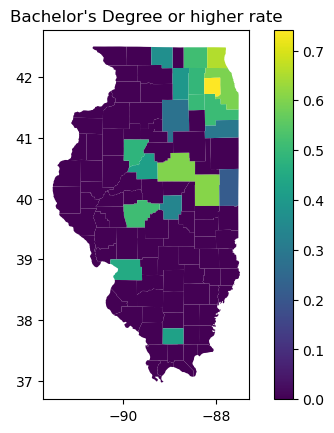

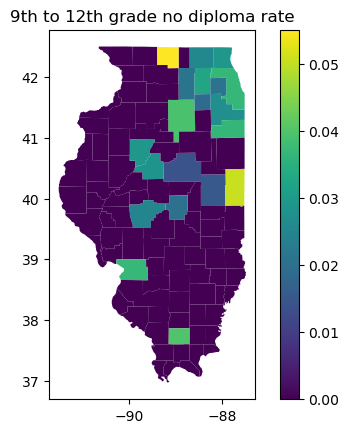

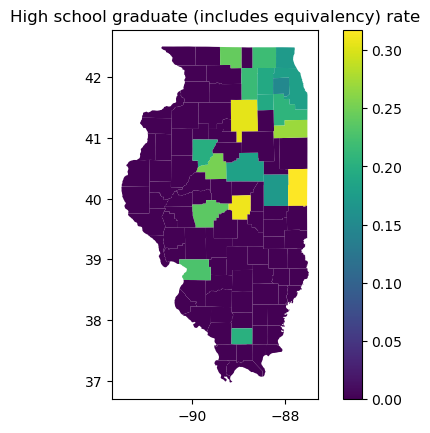

In [683]:
geo_edu_df.plot(column="Bachelor's degree or higher rate",legend=True) 
plt.title("Bachelor's Degree or higher rate") 
geo_edu_df.plot(column="9th to 12th grade no diploma rate",legend=True) 
plt.title("9th to 12th grade no diploma rate") 
geo_edu_df.plot(column="High school graduate (includes equivalency) rate",legend=True) 
plt.title("High school graduate (includes equivalency) rate") 

In [672]:
drug_df = updated_df.merge(pop_df, on='COUNTY_NAM', how='left')
for column in drug_df.columns.difference(['COUNTY_NAM']).tolist():
    new_col = column + " rate"
    drug_df[new_col] = drug_df[column]/drug_df['2020']

In [673]:
geo_drug_df = il.merge(drug_df, on='COUNTY_NAM', how='left')

Text(0.5, 1.0, 'Drug overdose rate in 2022')

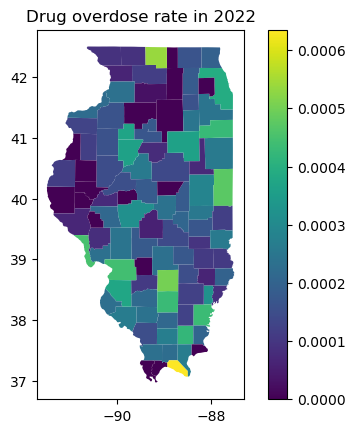

In [674]:
geo_drug_df.plot(column="Any 2022 rate",legend=True) 
plt.title("Drug overdose rate in 2022") 

/tmp/ipykernel_275/401569177.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(drug_df['Any 2022 rate'], shade=True)


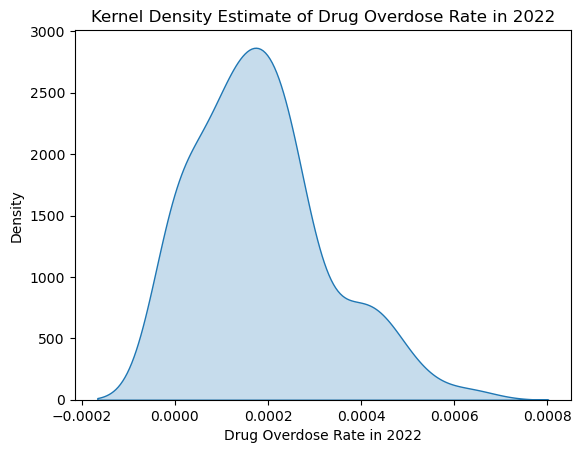

In [675]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(drug_df['Any 2022 rate'], shade=True)
plt.title('Kernel Density Estimate of Drug Overdose Rate in 2022')
plt.xlabel('Drug Overdose Rate in 2022')
plt.ylabel('Density')
plt.show()

/tmp/ipykernel_275/2378188727.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(income_data['2022'], shade=True)


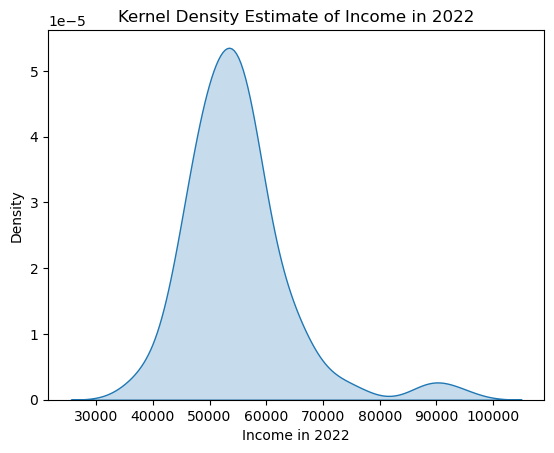

In [677]:
sns.kdeplot(income_data['2022'], shade=True)
plt.title('Kernel Density Estimate of Income in 2022')
plt.xlabel('Income in 2022')
plt.ylabel('Density')
plt.show()

/tmp/ipykernel_275/2087584210.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edu_df["Bachelor's degree or higher rate"], shade=True)


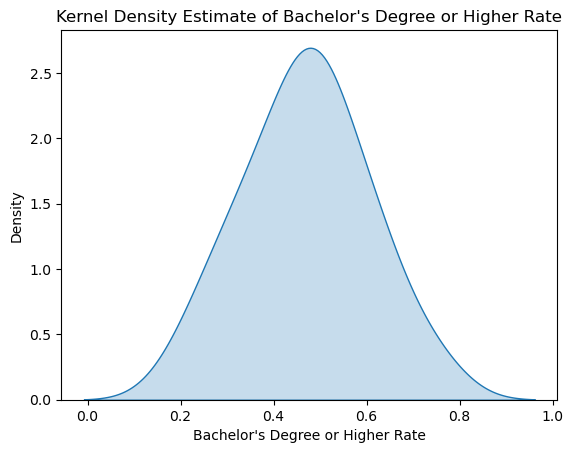

In [684]:
sns.kdeplot(edu_df["Bachelor's degree or higher rate"], shade=True)
plt.title("Kernel Density Estimate of Bachelor's Degree or Higher Rate")
plt.xlabel("Bachelor's Degree or Higher Rate")
plt.ylabel('Density')
plt.show()

/tmp/ipykernel_275/708617214.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edu_df["9th to 12th grade no diploma rate"], shade=True)


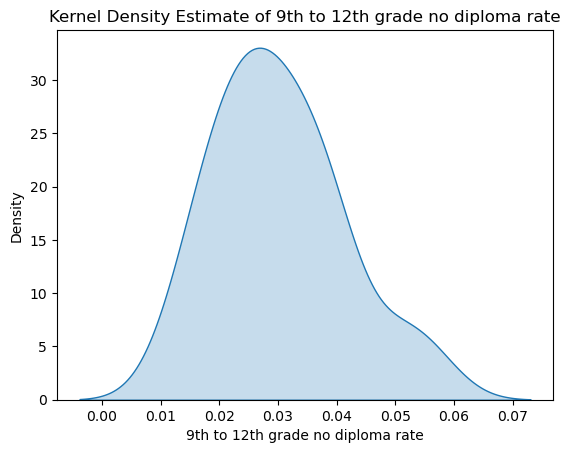

In [685]:
sns.kdeplot(edu_df["9th to 12th grade no diploma rate"], shade=True)
plt.title("Kernel Density Estimate of 9th to 12th grade no diploma rate")
plt.xlabel("9th to 12th grade no diploma rate")
plt.ylabel('Density')
plt.show()

/tmp/ipykernel_275/3943898582.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edu_df["High school graduate (includes equivalency) rate"], shade=True)


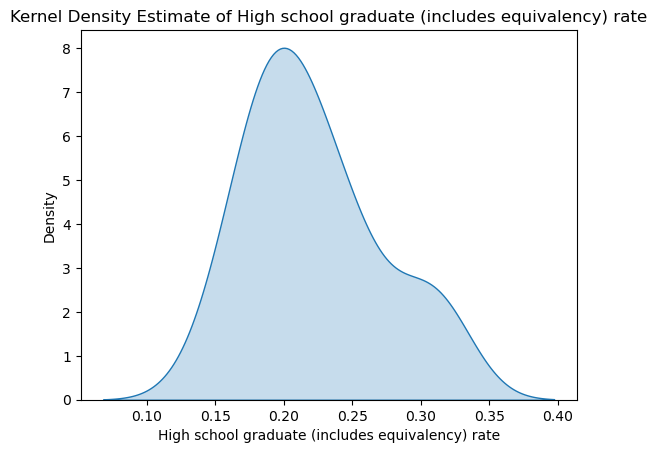

In [687]:
sns.kdeplot(edu_df["High school graduate (includes equivalency) rate"], shade=True)
plt.title("Kernel Density Estimate of High school graduate (includes equivalency) rate")
plt.xlabel("High school graduate (includes equivalency) rate")
plt.ylabel('Density')
plt.show()